In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

In [2]:
df = pd.read_parquet('data.parquet', engine='pyarrow')

In [3]:
df = df.between_time(start_time = '09:30:00', end_time = '16:00:00')

In [4]:
df.head(30)

,banknifty,nifty,tte
time,,,
2021-01-01 09:30:00,0.277355,0.194941,27
2021-01-01 09:31:00,0.275796,0.194808,27
2021-01-01 09:32:00,0.276555,0.194817,27
2021-01-01 09:33:00,0.276262,0.194857,27
2021-01-01 09:34:00,0.277114,0.194556,27
2021-01-01 09:35:00,0.276839,0.194429,27
2021-01-01 09:36:00,0.275827,0.194350,27
2021-01-01 09:37:00,0.275327,0.195977,27
2021-01-01 09:38:00,0.274066,0.194173,27


In [5]:
df.tail()

,banknifty,nifty,tte
time,,,
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28
2022-06-30 15:29:00,0.243426,0.216455,28
2022-06-30 15:30:00,0.241907,0.216081,28


In [6]:
df['banknif_mean']=df['banknifty']
df['nifty_mean']=df['nifty']
df['spread'] = df['banknifty']-df['nifty']
df['spread_mean']=df['banknifty']-df['nifty']
df['spread_std']=df['banknifty']-df['nifty']

In [7]:
a = df.resample("30min").agg({
        "banknifty": "last",
        "nifty": "last",
         "tte": "mean" ,
          "banknif_mean":"mean",
         "nifty_mean":"mean",
          "spread":"last",
          "spread_mean":"mean",
            "spread_std":"std"
    })

In [8]:
a.dropna(inplace = True)
a['tte'] = a['tte'].astype('int64')

In [9]:
a.head()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std
time,,,,,,,,
2021-01-01 09:30:00,0.269065,0.190697,27,0.272571,0.193553,0.078368,0.079018,0.001718
2021-01-01 10:00:00,0.268610,0.188223,27,0.267582,0.189851,0.080387,0.077730,0.001815
2021-01-01 10:30:00,0.265901,0.187138,27,0.266751,0.189028,0.078763,0.077723,0.001321
2021-01-01 11:00:00,0.264724,0.187323,27,0.265579,0.187993,0.077400,0.077586,0.001390
2021-01-01 11:30:00,0.262748,0.188835,27,0.263266,0.188544,0.073913,0.074721,0.001806


In [10]:
rth = a.between_time(start_time = '09:15:00', end_time = '16:00:00')

In [11]:
rth = rth.drop_duplicates(subset=['nifty'])

In [12]:
rth['z_score']= (rth['spread']-rth['spread_mean'])/(rth['spread_std'].std())

In [13]:
rth.head()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2021-01-01 09:30:00,0.269065,0.190697,27,0.272571,0.193553,0.078368,0.079018,0.001718,-0.187473
2021-01-01 10:00:00,0.268610,0.188223,27,0.267582,0.189851,0.080387,0.077730,0.001815,0.765661
2021-01-01 10:30:00,0.265901,0.187138,27,0.266751,0.189028,0.078763,0.077723,0.001321,0.300025
2021-01-01 11:00:00,0.264724,0.187323,27,0.265579,0.187993,0.077400,0.077586,0.001390,-0.053319
2021-01-01 11:30:00,0.262748,0.188835,27,0.263266,0.188544,0.073913,0.074721,0.001806,-0.232857


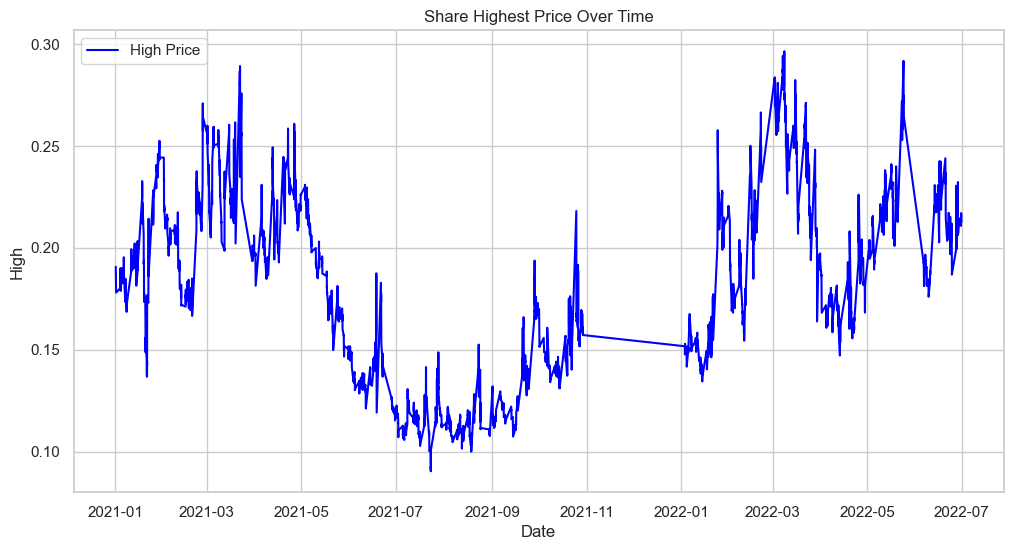

In [14]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=rth, x='time', y='nifty', label='High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
 
plt.show()

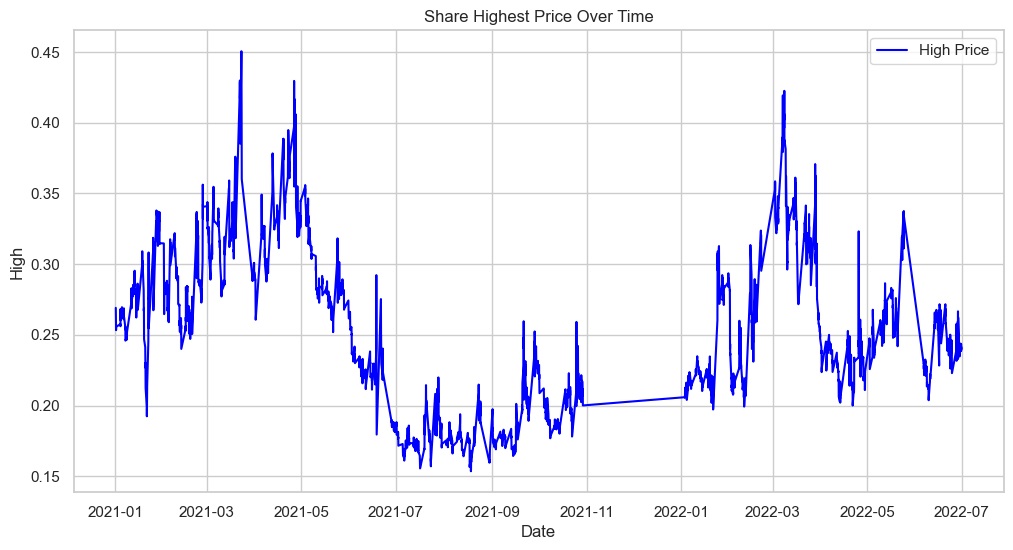

In [15]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=rth, x='time', y='banknifty', label='High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
 
plt.show()

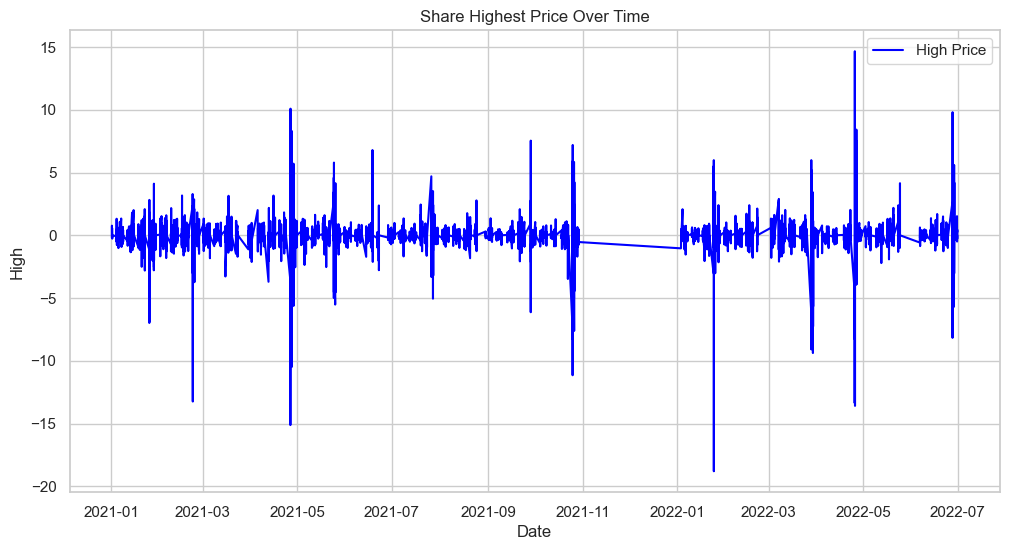

In [16]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=rth, x='time', y='z_score', label='High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
 
plt.show()

In [17]:
rth.head()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2021-01-01 09:30:00,0.269065,0.190697,27,0.272571,0.193553,0.078368,0.079018,0.001718,-0.187473
2021-01-01 10:00:00,0.268610,0.188223,27,0.267582,0.189851,0.080387,0.077730,0.001815,0.765661
2021-01-01 10:30:00,0.265901,0.187138,27,0.266751,0.189028,0.078763,0.077723,0.001321,0.300025
2021-01-01 11:00:00,0.264724,0.187323,27,0.265579,0.187993,0.077400,0.077586,0.001390,-0.053319
2021-01-01 11:30:00,0.262748,0.188835,27,0.263266,0.188544,0.073913,0.074721,0.001806,-0.232857


In [18]:
part_1 = rth.loc['2021-01-01':'2021-11-30']

In [19]:
part_1.head()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2021-01-01 09:30:00,0.269065,0.190697,27,0.272571,0.193553,0.078368,0.079018,0.001718,-0.187473
2021-01-01 10:00:00,0.268610,0.188223,27,0.267582,0.189851,0.080387,0.077730,0.001815,0.765661
2021-01-01 10:30:00,0.265901,0.187138,27,0.266751,0.189028,0.078763,0.077723,0.001321,0.300025
2021-01-01 11:00:00,0.264724,0.187323,27,0.265579,0.187993,0.077400,0.077586,0.001390,-0.053319
2021-01-01 11:30:00,0.262748,0.188835,27,0.263266,0.188544,0.073913,0.074721,0.001806,-0.232857


In [20]:
part_1.tail()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2021-10-29 13:00:00,0.208303,0.158025,27,0.208153,0.158913,0.050277,0.049240,0.000907,0.299126
2021-10-29 13:30:00,0.207843,0.158315,27,0.207747,0.157770,0.049528,0.049977,0.001037,-0.129446
2021-10-29 14:00:00,0.211768,0.161225,27,0.212082,0.163194,0.050543,0.048947,0.001562,0.460122
2021-10-29 14:30:00,0.205603,0.158826,27,0.208120,0.159715,0.046777,0.048405,0.001256,-0.468946
2021-10-29 15:00:00,0.200082,0.157203,27,0.205770,0.161019,0.042880,0.044751,0.001503,-0.539467


In [21]:
part_1['spread'].describe()

count    2492.000000
mean        0.080673
std         0.025442
min        -0.007531
25%         0.060194
50%         0.076695
75%         0.096815
max         0.205532
Name: spread, dtype: float64

In [22]:
part_1['z_score'].describe()

count    2492.000000
mean       -0.074486
std         1.174438
min       -15.119031
25%        -0.314408
50%        -0.006924
75%         0.237388
max        10.086407
Name: z_score, dtype: float64

In [23]:
part_2 = rth.loc['2022-01-01':]
part_2.head(15)

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2022-01-03 09:30:00,0.205901,0.151697,24,0.210234,0.152421,0.054204,0.057813,0.002483,-1.040246
2022-01-03 10:00:00,0.205539,0.149725,24,0.206027,0.150738,0.055814,0.055289,0.000599,0.151201
2022-01-03 10:30:00,0.206368,0.147662,24,0.206442,0.148216,0.058706,0.058226,0.000758,0.138529
2022-01-03 11:00:00,0.206508,0.148141,24,0.206075,0.147990,0.058367,0.058085,0.000507,0.081233
2022-01-03 11:30:00,0.207888,0.148281,24,0.206820,0.148176,0.059608,0.058643,0.001184,0.277895
2022-01-03 12:00:00,0.210823,0.148820,24,0.209930,0.148424,0.062003,0.061507,0.001132,0.143045
2022-01-03 12:30:00,0.210508,0.152044,24,0.211267,0.151136,0.058464,0.060132,0.001075,-0.480744
2022-01-03 13:00:00,0.209958,0.152921,24,0.210872,0.152653,0.057038,0.058220,0.001000,-0.340591
2022-01-03 13:30:00,0.209850,0.150542,24,0.209718,0.152152,0.059308,0.057565,0.001044,0.502230


In [24]:
part_2.tail()

,banknifty,nifty,tte,banknif_mean,nifty_mean,spread,spread_mean,spread_std,z_score
time,,,,,,,,,
2022-06-30 13:00:00,0.239374,0.216834,28,0.240153,0.216812,0.022540,0.023341,0.000828,-0.230767
2022-06-30 13:30:00,0.241754,0.215096,28,0.240211,0.215107,0.026658,0.025103,0.001240,0.448094
2022-06-30 14:00:00,0.238891,0.213684,28,0.239087,0.214299,0.025207,0.024788,0.001043,0.120641
2022-06-30 14:30:00,0.239686,0.212305,28,0.239297,0.213166,0.027382,0.026131,0.000980,0.360400
2022-06-30 15:00:00,0.243426,0.216455,28,0.239087,0.213060,0.026971,0.026027,0.001092,0.272198


In [25]:
array = part_1.index
end = array[len(array)-1]
t = array[0]
count = 0
flag = 0
profit = 100
th = 0.1
profit_1 = 0
profit_array = []
profit_array.append(profit)
changes = []
while count< len(array) :
    flag = 0 
    intial = count 
    
    if( part_1.loc[array[count]].z_score>=2):
       flag = -1 ## short the spread
       intial_spread = part_1.loc[array[count]].spread
       intial_tte = part_1.loc[array[count]].tte
       intial_price = intial_spread * ((intial_tte)**0.7)   
       count = count + 1 
    
    elif(  part_1.loc[array[count]].z_score<=-2):
        flag = 1 ## long the spread 
        intial_spread = part_1.loc[array[count]].spread
        intial_tte = part_1.loc[array[count]].tte
        intial_price = intial_spread * ((intial_tte)**0.7)
        count = count + 1 

    
    while count<len(array) and flag !=0 :
    
        if flag==-1: ## short poisition
            if (part_1.loc[array[count]].z_score >= +3) :
                ### selling our short positions and take the losses calculate the spread difference and its ovER
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
                
            if ((count - intial )>=55):
                ## sell our position at whath price it is at
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price)) 
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].tte < part_1.loc[array[count+1]].tte):
                ## break your position and exit it
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                flag = 0
                profit_array.append(profit)
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].z_score <=0):
                  ##end your position
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                profit_array.append(profit)
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
        elif flag == 1:
            if (part_1.loc[array[count]].z_score <= -3) :
                ### selling our short positions and take the losses calculate the spread difference and its ovER
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * (( curr_price-intial_price )/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
                
            if ((count - intial )>=55):
                ## sell our position at whath price it is at
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price) /intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].tte < part_1.loc[array[count+1]].tte):
                ## break your position and exit it
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price ) /intial_price) + profit 
                flag = 0
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].z_score >=0):
                  ##end your position
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

        count  = count + 1 
        
    count = count + 1 
    

print(profit)
profit_1 = profit - 100

short ,Intial date : 2021-01-15 09:30:00, final date :2021-01-25 10:00:00, intial_price :0.5583187888667455 , final_price :0.5819818724253156
long ,Intial date : 2021-01-25 11:00:00, final date :2021-01-25 15:00:00, intial_price :0.46298536160514664 , final_price :0.49344568314052095
long ,Intial date : 2021-01-27 14:00:00, final date :2021-01-27 15:00:00, intial_price :1.0251994539366092 , final_price :1.0574930255284725
long ,Intial date : 2021-01-28 10:30:00, final date :2021-01-28 13:00:00, intial_price :0.8201455875139018 , final_price :0.8559987494576984
long ,Intial date : 2021-01-28 13:30:00, final date :2021-01-29 14:30:00, intial_price :0.7133073896078042 , final_price :0.7436393871635693
short ,Intial date : 2021-02-08 15:00:00, final date :2021-02-08 15:30:00, intial_price :0.7810271773424107 , final_price :0.7679950406682051
short ,Intial date : 2021-02-15 15:00:00, final date :2021-02-22 13:00:00, intial_price :0.5581847517715338 , final_price :0.6058891217076361
long,Int

In [26]:
part_1 = part_2 
array = part_1.index
end = array[len(array)-1]
t = array[0]
count = 0
flag = 0

th = 0.1
profit_2 = 0 

while count< len(array) :
    flag = 0 
    intial = count 
    
    if( part_1.loc[array[count]].z_score>=2):
       flag = -1 ## short the spread
       intial_spread = part_1.loc[array[count]].spread
       intial_tte = part_1.loc[array[count]].tte
       intial_price = intial_spread * ((intial_tte)**0.7)   
       count = count + 1 
    
    elif(  part_1.loc[array[count]].z_score<=-2):
        flag = 1 ## long the spread 
        intial_spread = part_1.loc[array[count]].spread
        intial_tte = part_1.loc[array[count]].tte
        intial_price = intial_spread * ((intial_tte)**0.7)
        count = count + 1 
        

    
    while count<len(array) and flag !=0 :
    
        if flag==-1: ## short poisition
            if (part_1.loc[array[count]].z_score >= +3) :
                ### selling our short positions and take the losses calculate the spread difference and its ovER
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
                
            if ((count - intial )>=55):
                ## sell our position at whath price it is at
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].tte < part_1.loc[array[count+1]].tte):
                ## break your position and exit it
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].z_score <=0):
                  ##end your position
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((intial_price - curr_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append(100 * ((intial_price - curr_price)/intial_price))
                print(f"short ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
        elif flag == 1:
            if (part_1.loc[array[count]].z_score <= -3) :
                ### selling our short positions and take the losses calculate the spread difference and its ovER
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break
                
            if ((count - intial )>=55):
                ## sell our position at whath price it is at
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].tte < part_1.loc[array[count+1]].tte):
                ## break your position and exit it
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price)/intial_price) + profit 
                flag = 0
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

            if( part_1.loc[array[count]].z_score >=0):
                ## end your position
                curr_spread = part_1.loc[array[count]].spread
                curr_tte = part_1.loc[array[count]].tte
                curr_price = curr_spread * ((curr_tte)**0.7)  
                if abs((intial_price - curr_price) / intial_price) > th:
                    count  = count + 1 
                    continue
                profit =  100 * ((curr_price-intial_price)/intial_price) + profit 
                flag = 0 
                profit_array.append(profit)
                changes.append( 100 * (( curr_price-intial_price )/intial_price))
                print(f"long ,Intial date : {array[intial]}, final date :{array[count]}, intial_price :{intial_price} , final_price :{curr_price}")
                break

        count  = count + 1 
        
    count = count + 1 
    

print(profit)
profit_2 = profit-100- profit_1

short ,Intial date : 2022-01-04 09:30:00, final date :2022-01-04 12:30:00, intial_price :0.5904608426795792 , final_price :0.5585732815467762
long ,Intial date : 2022-01-18 14:30:00, final date :2022-01-18 15:30:00, intial_price :0.27535171940767184 , final_price :0.28360133047860586
long,Intial date : 2022-01-24 09:30:00, final date :2022-02-01 12:00:00, intial_price :0.5304028681850504 , final_price :0.5577158235464432
short ,Intial date : 2022-02-16 10:30:00, final date :2022-02-16 12:00:00, intial_price :0.2492966509328666 , final_price :0.23090073122189395
short ,Intial date : 2022-02-21 14:00:00, final date :2022-03-29 15:30:00, intial_price :0.1697093195471217 , final_price :0.1810859860008481
short ,Intial date : 2022-04-22 15:00:00, final date :2022-04-22 15:30:00, intial_price :0.25003770083181387 , final_price :0.2351513538968424
long ,Intial date : 2022-04-25 09:30:00, final date :2022-04-25 14:30:00, intial_price :0.30461638501151866 , final_price :0.32483466831743946
long

In [27]:
profit_1 + profit_2 

84.16112755515897

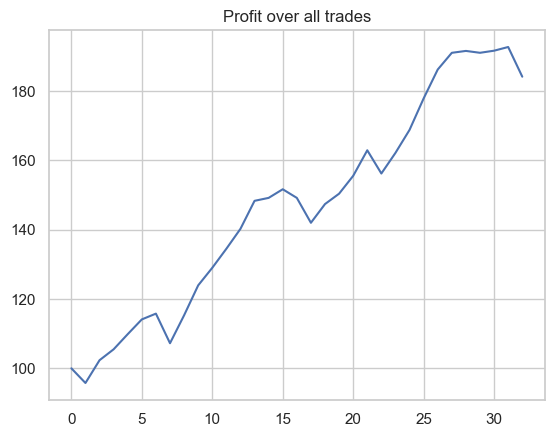

In [28]:
plt.plot(profit_array)
plt.title("Profit over all trades")
plt.show()

In [29]:
std_po = np.std(changes)

In [30]:
print('Total profit', sum(changes))

Total profit 84.16112755515897


In [31]:
sharpe = (profit_1 + profit_2) / (std_po * 14)
print('Sharpe ratio', sharpe)

Sharpe ratio 1.1907004951203024
